In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df1 = pd.read_csv("attack_annotated_comments.tsv", sep='\t')
df1.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train


In [3]:
df2 = pd.read_csv("attack_annotated_comments_sample.tsv", sep='\t')
df2.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train


In [4]:
df3 = pd.read_csv("attack_annotations_sample.tsv", sep='\t')
df3.head()

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,1362,0.0,0.0,0.0,0.0,0.0
1,37675,2408,0.0,0.0,0.0,0.0,0.0
2,37675,1493,0.0,0.0,0.0,0.0,0.0
3,37675,1439,0.0,0.0,0.0,0.0,0.0
4,37675,170,0.0,0.0,0.0,0.0,0.0


In [48]:
df4 = pd.read_csv("aggression_annotations.tsv", sep='\t')
df4.head()

,rev_id,worker_id,aggression,aggression_score
0,37675,1362,1.0,-1.0
1,37675,2408,0.0,1.0
2,37675,1493,0.0,0.0
3,37675,1439,0.0,0.0
4,37675,170,0.0,0.0


In [6]:
df5 = pd.read_csv("attack_worker_demographics.tsv", sep='\t')
df5.head()

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


Text(0.5, 0, 'Gender')

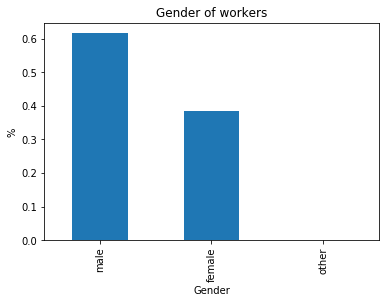

In [28]:
(df5['gender'].value_counts() / len(df5)).plot(kind='bar')
plt.title('Gender of workers')
plt.ylabel('%')
plt.xlabel('Gender')

Text(0.5, 0, 'Education')

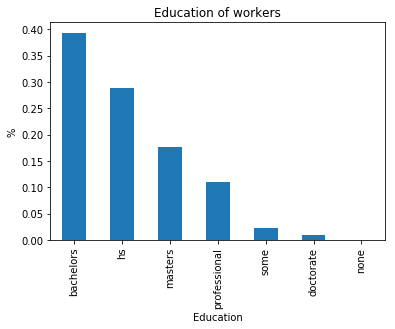

In [27]:
(df5['education'].value_counts() / len(df5)).plot(kind='bar')
plt.title('Education of workers')
plt.ylabel('%')
plt.xlabel('Education')

In [35]:
(df5['age_group'].value_counts() / len(df5))

18-30       0.478995
30-45       0.379452
45-60       0.099543
Under 18    0.016895
Over 60     0.009132
Name: age_group, dtype: float64

Text(0.5, 0, 'Age')

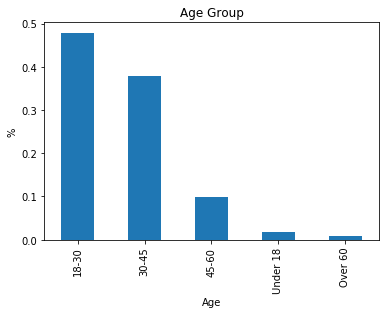

In [34]:
(df5['age_group'].value_counts() / len(df5)).plot(kind='bar')
plt.title('Age Group')
plt.ylabel('%')
plt.xlabel('Age')

Text(0.5, 0, '0 = No, 1 = Yes')

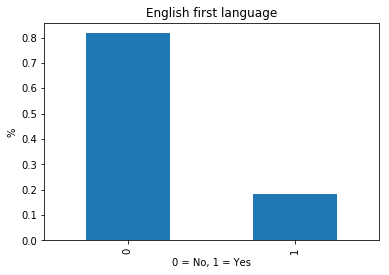

In [25]:
(df5['english_first_language'].value_counts() / len(df5)).plot(kind='bar')
plt.title('English first language')
plt.ylabel('%')
plt.xlabel('0 = No, 1 = Yes')

In [40]:
df5['english_first_language'].value_counts() / len(df5)

0    0.816438
1    0.183562
Name: english_first_language, dtype: float64

In [30]:
df5.head()

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


In [32]:
df5

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs
5,164,female,0,30-45,bachelors
6,301,male,0,18-30,professional
7,77,female,1,30-45,some
8,865,female,1,30-45,doctorate
9,715,male,0,18-30,bachelors


In [49]:
df_merged = pd.merge(df5, df4, on='worker_id', how='right')
df_merged.head()

,worker_id,gender,english_first_language,age_group,education,rev_id,aggression,aggression_score
0,833,female,0.0,45-60,bachelors,4763903,0.0,0.0
1,833,female,0.0,45-60,bachelors,5350726,0.0,0.0
2,833,female,0.0,45-60,bachelors,5838638,0.0,0.0
3,833,female,0.0,45-60,bachelors,6270546,0.0,0.0
4,833,female,0.0,45-60,bachelors,6735507,0.0,0.0


Text(0.5, 0, 'Age')

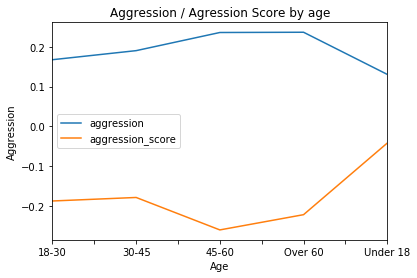

In [68]:
df_merged.groupby(['age_group']).mean()[['aggression', 'aggression_score']].plot()
plt.title("Aggression / Agression Score by age")
plt.ylabel ('Aggression')
plt.xlabel('Age')

Text(0.5, 0, 'Gender')

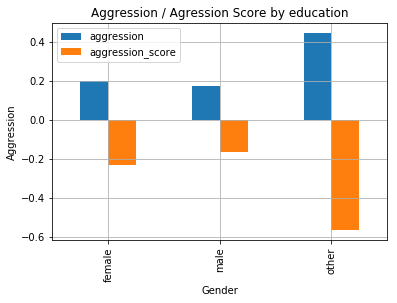

In [71]:
df_merged.groupby(['gender']).mean()[['aggression', 'aggression_score']].plot(kind='bar')
plt.title("Aggression / Agression Score by education")
plt.ylabel ('Aggression')
plt.grid()
plt.xlabel('Gender')

Text(0.5, 0, 'Education')

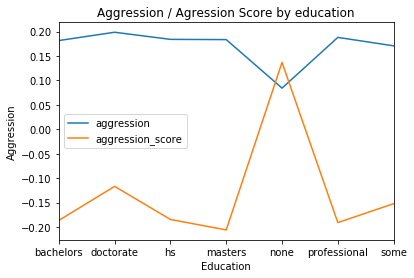

In [62]:
df_merged.groupby(['education']).mean()[['aggression', 'aggression_score']].plot()
plt.title("Aggression / Agression Score by education")
plt.ylabel ('Aggression')
plt.xlabel('Education')

In [59]:
df_merged.groupby(['english_first_language']).mean()[['aggression', 'aggression_score']]

,aggression,aggression_score
english_first_language,,
0.0,0.179116,-0.188224
1.0,0.210145,-0.191200
